In [0]:
from google.colab import files

uploaded = files.upload()

Saving platanos.zip to platanos.zip


In [0]:
#https://www.tensorflow.org/tutorials/images/classification#import_packages

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#erased file
#from shutil import rmtree
#rmtree("cats_and_dogs_filtered")

In [0]:
#_URL = 'https://drive.google.com/uc?id=1UlAqjaxb9lYo9fCbiyRJCe5nhka1Gbrp&export=download'

#path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

!unzip platanos.zip

#PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs')
#PATH = "/content/cats_and_dogs"
#print(PATH)

Archive:  platanos.zip
  inflating: platanos/validation/malos/images-w101.jpeg  
  inflating: platanos/validation/malos/images-w78.jpeg  
  inflating: platanos/validation/malos/images-w69.jpeg  
  inflating: platanos/validation/malos/images-w61.jpeg  
  inflating: platanos/validation/malos/images-w90.jpeg  
  inflating: platanos/validation/malos/images-w82.jpeg  
  inflating: platanos/validation/malos/images-w103.jpeg  
  inflating: platanos/validation/malos/images-w81.jpeg  
  inflating: platanos/validation/malos/images-w93.jpeg  
  inflating: platanos/validation/malos/images-w104.jpeg  
  inflating: platanos/validation/malos/images-w73.jpeg  
  inflating: platanos/validation/malos/images-w85.jpeg  
  inflating: platanos/validation/malos/images-w74.jpeg  
  inflating: platanos/validation/malos/images-w57.jpeg  
  inflating: platanos/validation/malos/images-w95.jpeg  
  inflating: platanos/validation/malos/images-w64.jpeg  
  inflating: platanos/validation/malos/images-w98.jpeg  
  inf

In [0]:
PATH = "/content/platanos"
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [0]:
train_buenos_dir = os.path.join(train_dir, 'buenos')  # directory with our training cat pictures
train_malos_dir = os.path.join(train_dir, 'malos')  # directory with our training dog pictures
validation_buenos_dir = os.path.join(validation_dir, 'buenos')  # directory with our validation cat pictures
validation_malos_dir = os.path.join(validation_dir, 'malos')  # directory with our validation dog pictures

In [0]:
num_buenos_tr = len(os.listdir(train_buenos_dir))
num_malos_tr = len(os.listdir(train_malos_dir))

num_buenos_val = len(os.listdir(validation_buenos_dir))
num_malos_val = len(os.listdir(validation_malos_dir))

total_train = num_buenos_tr + num_malos_tr
total_val = num_buenos_val + num_malos_val

In [0]:
print('total training platanos buenos images:', num_buenos_tr)
print('total training platanos malos images:', num_malos_tr)

print('total validation platanos buenos images:', num_buenos_val)
print('total validation platanos malos images:', num_malos_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training platanos buenos images: 308
total training platanos malos images: 215
total validation platanos buenos images: 60
total validation platanos malos images: 60
--
Total training images: 523
Total validation images: 120


In [0]:
batch_size = 34
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [149]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 523 images belonging to 2 classes.


In [150]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 120 images belonging to 2 classes.


In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

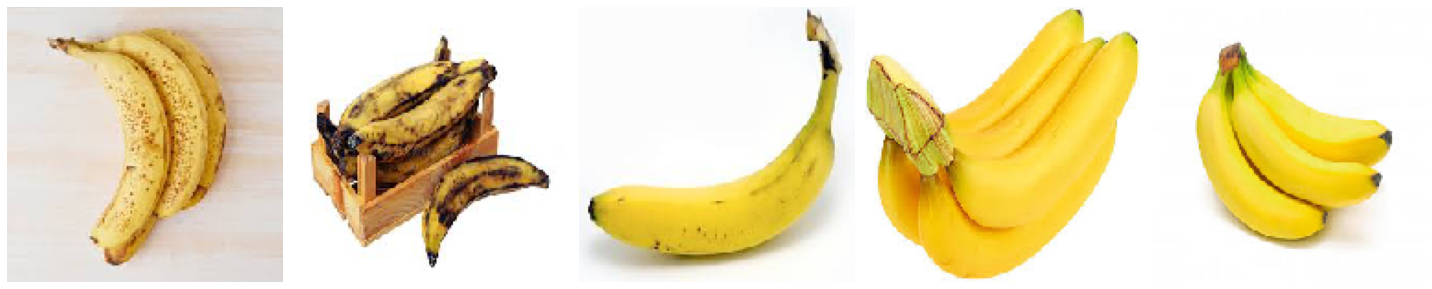

In [153]:
plotImages(sample_training_images[:5])

In [0]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [156]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 20736)           

In [157]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
15/15 [==============================] - 11s 758ms/step - loss: 1.0784 - accuracy: 0.5726 - val_loss: 0.5592 - val_accuracy: 0.5098
Epoch 2/15
15/15 [==============================] - 11s 746ms/step - loss: 0.2675 - accuracy: 0.8863 - val_loss: 0.1754 - val_accuracy: 0.9314
Epoch 3/15
15/15 [==============================] - 11s 720ms/step - loss: 0.1180 - accuracy: 0.9591 - val_loss: 0.1056 - val_accuracy: 0.9804
Epoch 4/15
15/15 [==============================] - 11s 722ms/step - loss: 0.0863 - accuracy: 0.9714 - val_loss: 0.1065 - val_accuracy: 0.9804
Epoch 5/15
15/15 [==============================] - 11s 720ms/step - loss: 0.0414 - accuracy: 0.9836 - val_loss: 0.0665 - val_accuracy: 0.9902
Epoch 6/15
15/15 [==============================] - 11s 720ms/step - loss: 0.0339 - accuracy: 0.9857 - val_loss: 0.1062 - val_accuracy: 0.9804
Epoch 7/15
15/15 [==============================] - 11s 722ms/step - loss: 0.0150 - accuracy: 0.9939 - val_loss: 0.1786 - val_accuracy: 0.9706

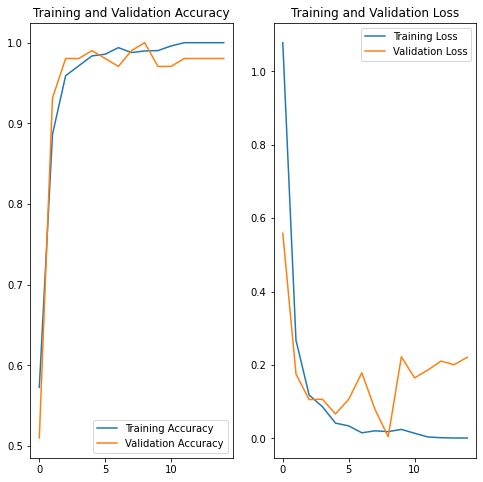

In [158]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
#*************************************************************************************
#It did great! with a low accuracy of 79% and a high of 98%
#improve the results
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 523 images belonging to 2 classes.


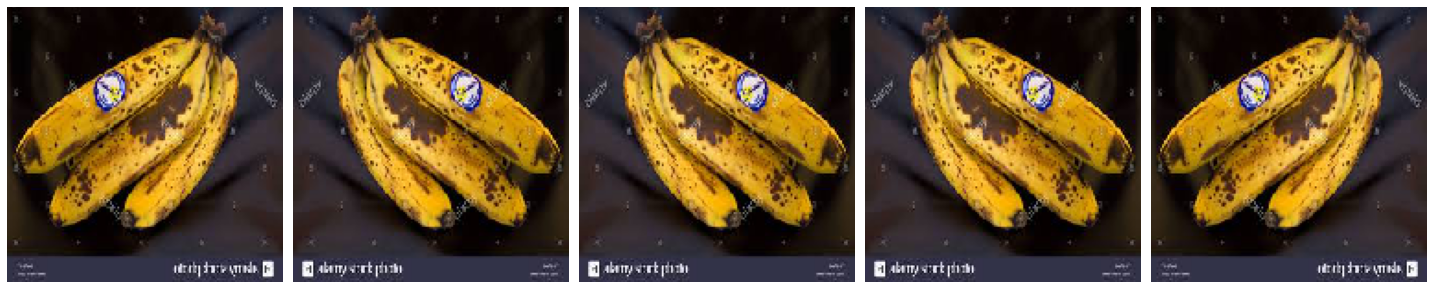

In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 523 images belonging to 2 classes.


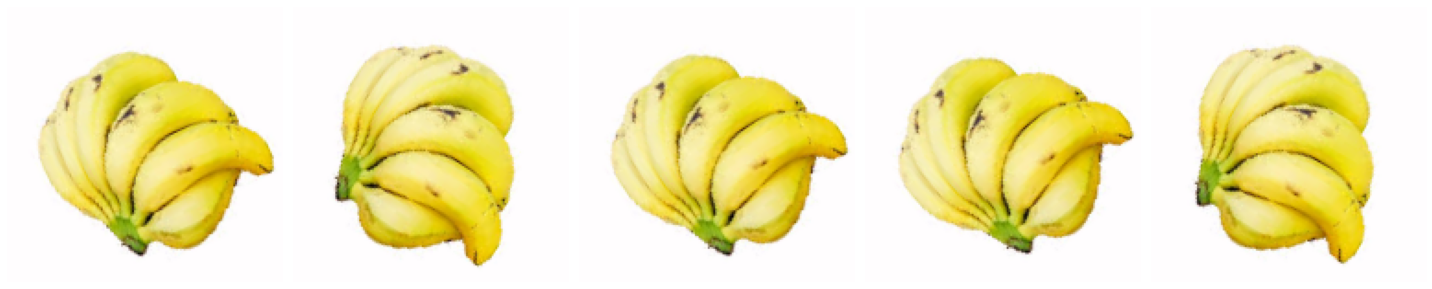

In [0]:
plotImages(augmented_images)

In [0]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 523 images belonging to 2 classes.


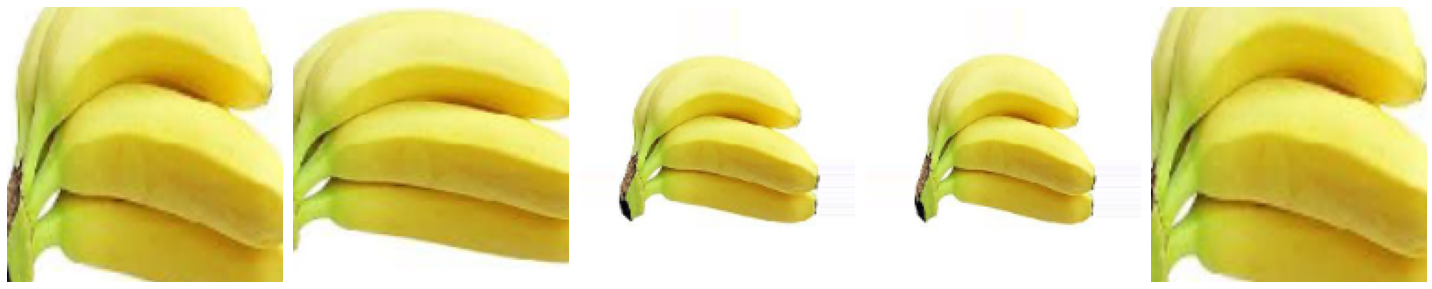

In [0]:
plotImages(augmented_images)

In [0]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 523 images belonging to 2 classes.


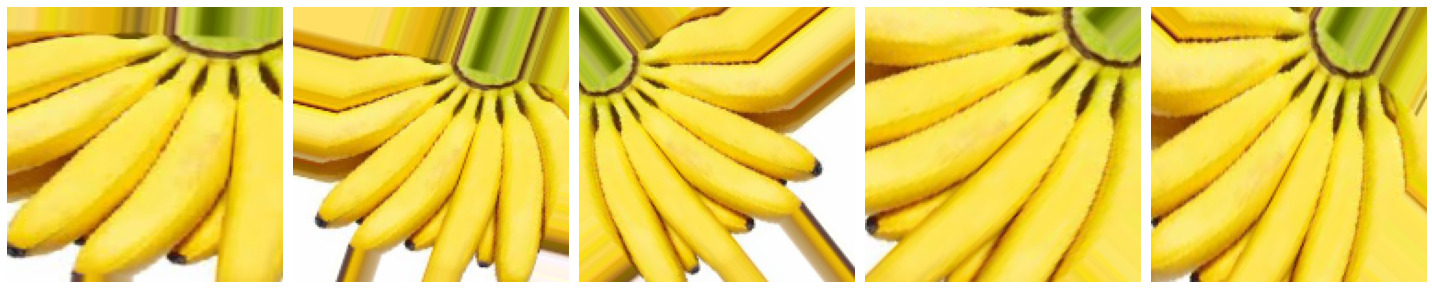

In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [0]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 120 images belonging to 2 classes.


In [0]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 18, 18, 64)       

In [0]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
37/37 [==============================] - 16s 445ms/step - loss: 0.6941 - accuracy: 0.6621 - val_loss: 0.1903 - val_accuracy: 0.9196
Epoch 2/15
37/37 [==============================] - 17s 447ms/step - loss: 0.1556 - accuracy: 0.9293 - val_loss: 0.1678 - val_accuracy: 0.9643
Epoch 3/15
37/37 [==============================] - 17s 452ms/step - loss: 0.1743 - accuracy: 0.9273 - val_loss: 0.2219 - val_accuracy: 0.9554
Epoch 4/15
37/37 [==============================] - 17s 459ms/step - loss: 0.1458 - accuracy: 0.9528 - val_loss: 0.1523 - val_accuracy: 0.9732
Epoch 5/15
37/37 [==============================] - 17s 455ms/step - loss: 0.1352 - accuracy: 0.9450 - val_loss: 0.1798 - val_accuracy: 0.9643
Epoch 6/15
37/37 [==============================] - 17s 452ms/step - loss: 0.1028 - accuracy: 0.9686 - val_loss: 0.1508 - val_accuracy: 0.9464
Epoch 7/15
37/37 [==============================] - 17s 450ms/step - loss: 0.1503 - accuracy: 0.9489 - val_loss: 0.1338 - val_accuracy: 0.9554

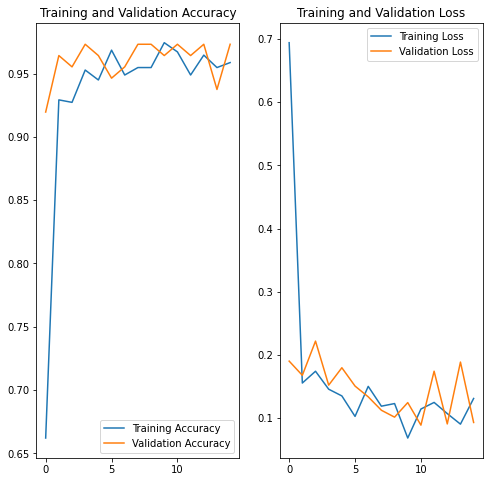

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()